<a href="https://colab.research.google.com/github/sharna33/Iris_Flower_Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Flower Classification**  

● Use measurements of Iris flowers (setosa, versicolor, virginica) as input data.  
● Train a machine learning model to classify the species based on these measurements.  
● Use libraries like Scikit-learn for easy dataset access and model building.   
● Evaluate the model’s accuracy and performance using test data.  
● Understand basic classification concepts in machine learning.   
● DOWNLOAD DATASET FROM https://www.kaggle.com/datasets/saurabh00007/iriscsv

## **Import Libraries**

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## **Download & Load Dataset from GitHub**

In [3]:
# URL to your GitHub CSV file
url = "https://raw.githubusercontent.com/sharna33/Iris_Flower_Classification/refs/heads/main/Iris.csv"

print(f"🔗 Connecting to: {url}")
print("⏳ Downloading dataset...")

try:
    # Load the dataset directly from the URL
    df = pd.read_csv(url)
    print("✅ Dataset downloaded successfully from GitHub!")

    # Display the first few rows to understand the structure
    print("\n👀 First look at the data:")
    print(df.head())

    # Check the column names
    print(f"\n📋 Column names: {list(df.columns)}")

    # Check if there's an 'Id' column and remove it if present
    if 'Id' in df.columns:
        df = df.drop('Id', axis=1)
        print("🗑️ Removed 'Id' column as it's not needed for classification")

    # Standardize column names (make them lowercase and consistent)
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # Check the target column name and standardize it
    target_col = df.columns[-1]  # Usually the last column
    print(f"🎯 Target column: '{target_col}'")

    # If the target column has a different name, rename it to 'species'
    if target_col != 'species':
        df = df.rename(columns={target_col: 'species'})
        print(f"📝 Renamed target column to 'species'")

    # Clean up species names (remove any extra spaces, make consistent)
    df['species'] = df['species'].str.strip().str.lower()

except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    print("🔄 Falling back to sklearn built-in dataset...")

    # Fallback to sklearn dataset
    from sklearn.datasets import load_iris
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=['sepal_length_(cm)', 'sepal_width_(cm)',
                                         'petal_length_(cm)', 'petal_width_(cm)'])
    df['species'] = iris.target
    species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    df['species'] = df['species'].map(species_map)

print("✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"🌸 We have {df.shape[0]} flowers and {df.shape[1]-1} features")

🔗 Connecting to: https://raw.githubusercontent.com/sharna33/Iris_Flower_Classification/refs/heads/main/Iris.csv
⏳ Downloading dataset...
✅ Dataset downloaded successfully from GitHub!

👀 First look at the data:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

📋 Column names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
🗑️ Removed 'Id' column as it's not needed for classification
🎯 Target column: 'species'
✅ Dataset loaded successfully!
📊 Dataset shape: (150, 5)
🌸 We have 150 flowers and 4 features


## **Explore the Data**




In [4]:
print("🔍 Step 3: Let's explore our flower data...")
print("=" * 50)

# Display first few rows
print("👀 First 5 rows of our dataset:")
print(df.head())
print("\n")

# Basic information about the dataset
print("📋 Dataset Info:")
print(f"• Total samples: {len(df)}")
print(f"• Features: {list(df.columns[:-1])}")
print(f"• Target: {df.columns[-1]}")
print("\n")

# Check for missing values
print("🔍 Missing values check:")
print(df.isnull().sum())
print("\n")

# Statistical summary
print("📊 Statistical Summary:")
print(df.describe())
print("\n")

# Species distribution
print("🌺 Species Distribution:")
species_counts = df['species'].value_counts()
print(species_counts)

🔍 Step 3: Let's explore our flower data...
👀 First 5 rows of our dataset:
   sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm      species
0            5.1           3.5            1.4           0.2  iris-setosa
1            4.9           3.0            1.4           0.2  iris-setosa
2            4.7           3.2            1.3           0.2  iris-setosa
3            4.6           3.1            1.5           0.2  iris-setosa
4            5.0           3.6            1.4           0.2  iris-setosa


📋 Dataset Info:
• Total samples: 150
• Features: ['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm']
• Target: species


🔍 Missing values check:
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64


📊 Statistical Summary:
       sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
s

## **Data Visualization**

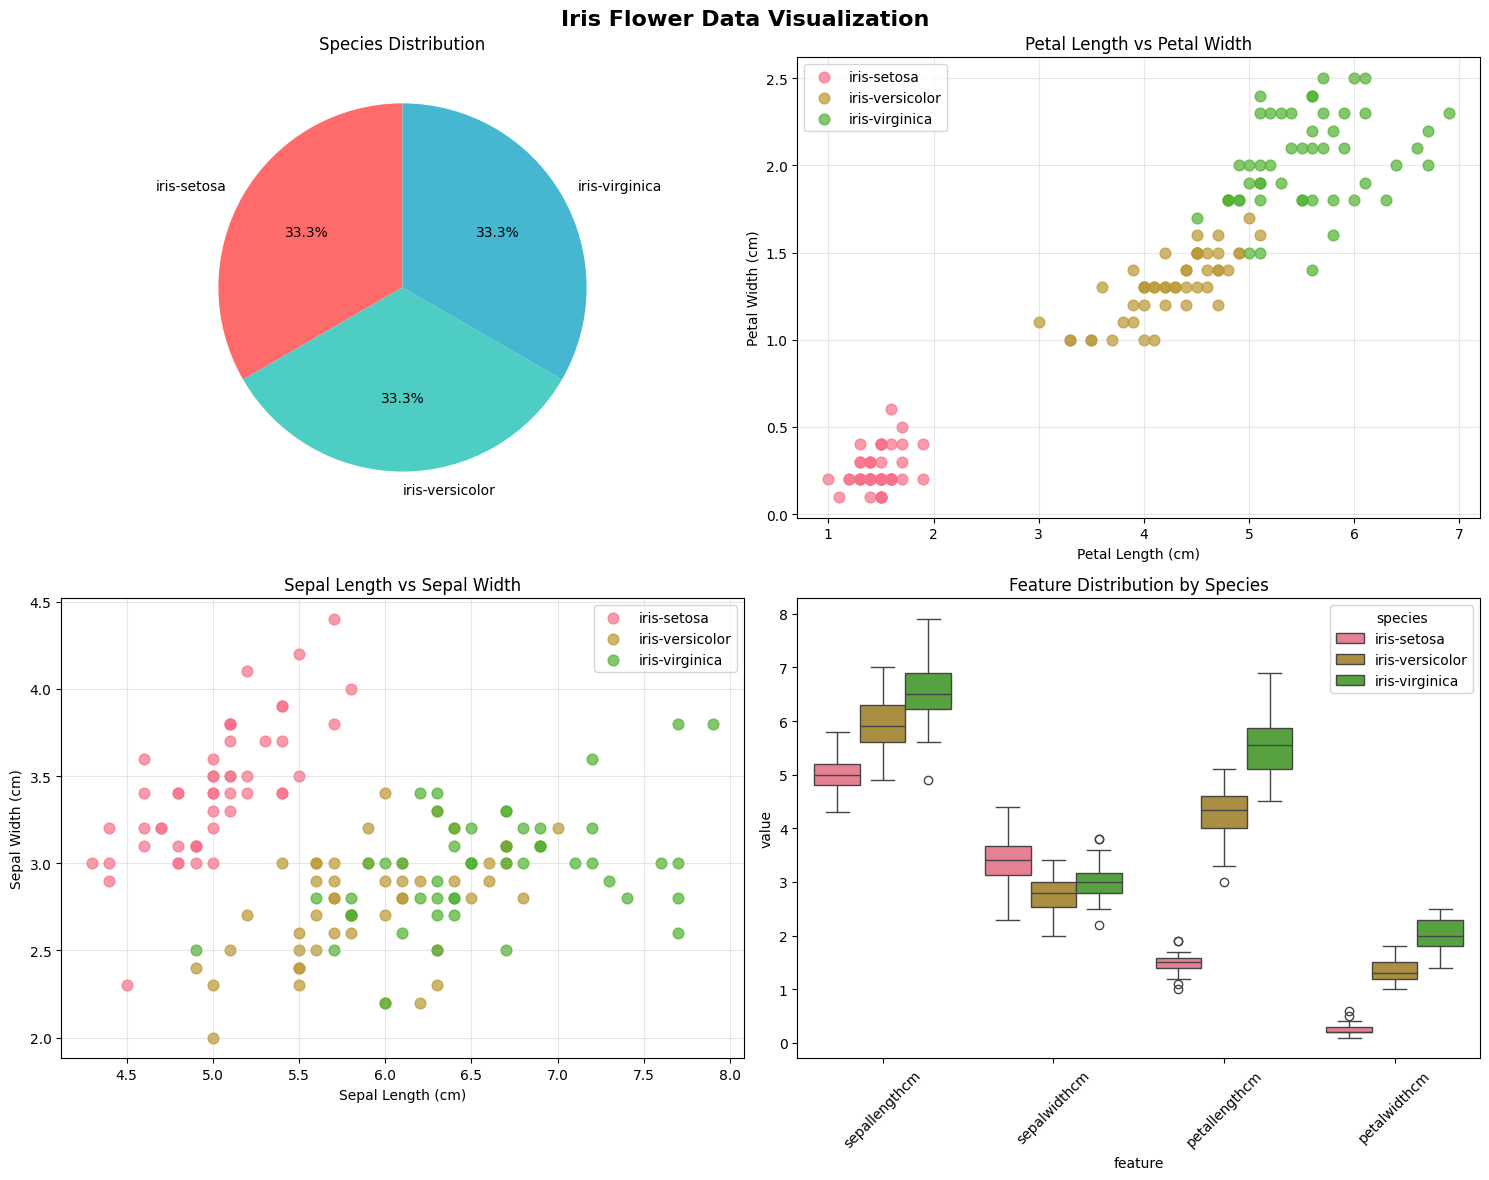

✅ Data visualization complete!
💡 Key observations:
• Setosa flowers are clearly separable from the others
• Virginica tends to have larger petals
• Versicolor is in between setosa and virginica


In [5]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Flower Data Visualization', fontsize=16, fontweight='bold')

# 1. Species distribution pie chart
axes[0, 0].pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%',
               startangle=90, colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 0].set_title('Species Distribution')

# Get the actual column names (they might be different in your dataset)
cols = [col for col in df.columns if col != 'species']
petal_length_col = [col for col in cols if 'petal' in col and 'length' in col][0]
petal_width_col = [col for col in cols if 'petal' in col and 'width' in col][0]
sepal_length_col = [col for col in cols if 'sepal' in col and 'length' in col][0]
sepal_width_col = [col for col in cols if 'sepal' in col and 'width' in col][0]

# 2. Petal Length vs Petal Width scatter plot
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    axes[0, 1].scatter(species_data[petal_length_col], species_data[petal_width_col],
                      label=species, alpha=0.7, s=60)
axes[0, 1].set_xlabel('Petal Length (cm)')
axes[0, 1].set_ylabel('Petal Width (cm)')
axes[0, 1].set_title('Petal Length vs Petal Width')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Sepal Length vs Sepal Width scatter plot
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    axes[1, 0].scatter(species_data[sepal_length_col], species_data[sepal_width_col],
                      label=species, alpha=0.7, s=60)
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Sepal Width (cm)')
axes[1, 0].set_title('Sepal Length vs Sepal Width')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Box plot of all features
df_melted = df.melt(id_vars=['species'], var_name='feature', value_name='value')
sns.boxplot(data=df_melted, x='feature', y='value', hue='species', ax=axes[1, 1])
axes[1, 1].set_title('Feature Distribution by Species')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Data visualization complete!")
print("💡 Key observations:")
print("• Setosa flowers are clearly separable from the others")
print("• Virginica tends to have larger petals")
print("• Versicolor is in between setosa and virginica")

## **Prepare Data for Machine Learning**

In [6]:
# Separate features (X) and target (y)
X = df.drop('species', axis=1)  # Features: measurements
y = df['species']               # Target: species names

print("📋 Features (X):")
print(f"• Shape: {X.shape}")
print(f"• Columns: {list(X.columns)}")
print("\n")

print("🎯 Target (y):")
print(f"• Shape: {y.shape}")
print(f"• Unique values: {y.unique()}")
print("\n")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("📊 Data split:")
print(f"• Training set: {X_train.shape[0]} samples")
print(f"• Testing set: {X_test.shape[0]} samples")
print(f"• Split ratio: 70% train, 30% test")

📋 Features (X):
• Shape: (150, 4)
• Columns: ['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm']


🎯 Target (y):
• Shape: (150,)
• Unique values: ['iris-setosa' 'iris-versicolor' 'iris-virginica']


📊 Data split:
• Training set: 105 samples
• Testing set: 45 samples
• Split ratio: 70% train, 30% test


## **Train Multiple Machine Learning Models**

In [22]:
# Initialize different models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True)
}

# Dictionary to store results
results = {}

print("🏃‍♂️ Training models...")
for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'accuracy': accuracy
    }

    print(f"✅ {name} accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

🏃‍♂️ Training models...

🔄 Training Random Forest...
✅ Random Forest accuracy: 0.8889 (88.89%)

🔄 Training Logistic Regression...
✅ Logistic Regression accuracy: 0.9333 (93.33%)

🔄 Training Support Vector Machine...
✅ Support Vector Machine accuracy: 0.9556 (95.56%)


## **Model Evaluation & Comparison**  
F1-score:
* The harmonic mean of precision and recall.
* It balances precision and recall into a single number.
* F1-score is high only if both precision and recall are high.  

Support:
* The number of actual samples of each class in your test set.
* It shows how many true examples of each flower species are present.
* Important to understand class distribution and whether metrics are reliable.

Confusion Matrix:   
A confusion matrix is a table that helps you understand how well your classification model is performing by showing the counts of:

1. True Positives (TP): Correctly predicted positive cases.
2. True Negatives (TN): Correctly predicted negative cases.
3. False Positives (FP): Incorrectly predicted positive cases (Type I error).
4. False Negatives (FN): Incorrectly predicted negative cases (Type II error).



🏆 Best Model: Support Vector Machine
🎯 Best Accuracy: 0.9556 (95.56%)


📈 Detailed evaluation of Support Vector Machine:

📋 Classification Report:
                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        15
iris-versicolor       0.93      0.93      0.93        15
 iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45


🔍 Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


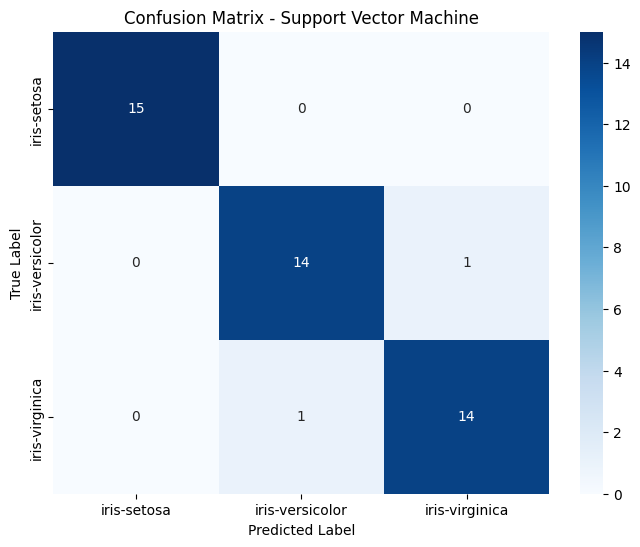

In [25]:
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"🏆 Best Model: {best_model_name}")
print(f"🎯 Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print("\n")

# Detailed evaluation of the best model
print(f"📈 Detailed evaluation of {best_model_name}:")
print("=" * 50)

# Classification report
y_pred_best = results[best_model_name]['predictions']
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
print("\n🔍 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(df['species'].unique()),
            yticklabels=sorted(df['species'].unique()))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## **Make Predictions for New Data**

In [26]:
feature_cols = [col for col in df.columns if col != 'species']

new_flowers = pd.DataFrame({
    feature_cols[0]: [5.1, 6.0, 7.2],  # sepal length
    feature_cols[1]: [3.5, 2.8, 3.0],  # sepal width
    feature_cols[2]: [1.4, 4.1, 6.0],  # petal length
    feature_cols[3]: [0.2, 1.3, 2.5]   # petal width
})

print("🌺 New flower measurements:")
print(new_flowers)
print("\n")

# Make predictions
predictions = best_model.predict(new_flowers)

# Get prediction probabilities (with error handling)
try:
    prediction_proba = best_model.predict_proba(new_flowers)
    proba_available = True
except AttributeError:
    print("⚠️  Probability predictions not available for this model")
    proba_available = False

print("🎯 Predictions:")
for i, pred in enumerate(predictions):
    if proba_available:
        confidence = max(prediction_proba[i])
        print(f"Flower {i+1}: {pred} (confidence: {confidence:.2f})")
    else:
        print(f"Flower {i+1}: {pred}")

# If probabilities are available, show detailed breakdown
if proba_available:
    print("\n📊 Detailed Probability Breakdown:")
    species_names = sorted(df['species'].unique())
    for i, proba in enumerate(prediction_proba):
        print(f"\nFlower {i+1}:")
        for species, prob in zip(species_names, proba):
            print(f"  • {species}: {prob:.3f} ({prob*100:.1f}%)")

🌺 New flower measurements:
   sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm
0            5.1           3.5            1.4           0.2
1            6.0           2.8            4.1           1.3
2            7.2           3.0            6.0           2.5


🎯 Predictions:
Flower 1: iris-setosa (confidence: 0.97)
Flower 2: iris-versicolor (confidence: 0.97)
Flower 3: iris-virginica (confidence: 0.99)

📊 Detailed Probability Breakdown:

Flower 1:
  • iris-setosa: 0.967 (96.7%)
  • iris-versicolor: 0.022 (2.2%)
  • iris-virginica: 0.011 (1.1%)

Flower 2:
  • iris-setosa: 0.012 (1.2%)
  • iris-versicolor: 0.974 (97.4%)
  • iris-virginica: 0.015 (1.5%)

Flower 3:
  • iris-setosa: 0.010 (1.0%)
  • iris-versicolor: 0.002 (0.2%)
  • iris-virginica: 0.987 (98.7%)


🎉 Project completed successfully!

📊 Key Results:  
• Best model: Support Vector Machine  
• Best accuracy: 95.56%  
• Dataset size: 150 samples   
• Features used: 4   

💡 Key Insights:
• All models performed very well (>90% accuracy)   
• Iris dataset is well-suited for classification    
• Petal measurements are most important for classification   
• Setosa is easily distinguishable from other species   

🚀 Next Steps:   
• Try different algorithms (Neural Networks, etc.)   
• Experiment with feature engineering  
• Use cross-validation for more robust evaluation   
• Deploy the model for real-world use   

======================================================================
🌸 Thank you for following this Iris Classification tutorial! 🌸
======================================================================